<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller: Modelos de deterioro <br>
    Parte 2 (puntos 3 y 4)</center></h1>

Importamos las librerias a utilizar...

In [1]:
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib.pyplot as plt # importar librería de matplotlib
import numpy as np
import math
import sympy as sym
from sympy import integrate
import scipy as sp
import scipy.stats as ss
from scipy.stats import gamma
import decimal
import seaborn as sns
decimal.getcontext().prec = 5
%matplotlib inline

<h4> 3. Considere un sistema cuyo estado inicial es $v_0=100$ y la condición de estado límite $k^*=25$; El deterioro del sistema depende del daño derivado de la ocurrencia de shocks únicamente. El tiempo entre shocks sigue una distribución exponencial con tasa $\lambda$. 

Para las siguientes combinaciones: 

Caso | Shocks | $\lambda$
:-------------------:|:---------------:|:--------------------:
**1**       | LN(10,2)   | 0.1
**2**       | LN(10,2)   | 0.05
**3**       | EXP(10)   | 0.1
**4**       | EXP(10)   | 0.05

Nota: En la distribución exponencial, el parámetro es la media del tamaño de los shocks; i.e., $1/\nu$.

<h5> $\bullet$ Evalúe el tiempo medio a la falla de cada combinación. Explique su proceso.<\h5>

In [2]:
v0=100
k=25

lambda_caso1=0.1
lambda_caso2=0.05
lambda_caso3=0.1
lambda_caso4=0.05

In [3]:
tiempo_falla_caso1=np.zeros(1000)
tiempo_falla_caso2=np.zeros(1000)
tiempo_falla_caso3=np.zeros(1000)
tiempo_falla_caso4=np.zeros(1000)

In [4]:
#Caso 1
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.lognormal(np.log(10)-0.5*np.log(1+2**2),(np.log(1+2**2))**(1/2))
        v=v0-suma_shocks
        tiempo=tiempo+np.random.exponential(1/lambda_caso1)     
    tiempo_falla_caso1[i]=tiempo 

#Caso 2
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.lognormal(np.log(10)-0.5*np.log(1+2**2),(np.log(1+2**2))**(1/2))
        v=v0-suma_shocks
        tiempo=tiempo+np.random.exponential(1/lambda_caso2)     
    tiempo_falla_caso2[i]=tiempo 

    
#Caso 3
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.exponential(10)
        v=v0-suma_shocks
        tiempo=tiempo+np.random.exponential(1/lambda_caso3)     
    tiempo_falla_caso3[i]=tiempo 

#Caso 4
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.exponential(10)
        v=v0-suma_shocks
        tiempo=tiempo+np.random.exponential(1/lambda_caso4)     
    tiempo_falla_caso4[i]=tiempo 


TMF1=round(tiempo_falla_caso1.mean(),2)
TMF2=round(tiempo_falla_caso2.mean(),2)
TMF3=round(tiempo_falla_caso3.mean(),2)
TMF4=round(tiempo_falla_caso4.mean(),2)
TMF1,TMF2,TMF3,TMF4

(92.15, 188.92, 83.89, 170.26)

<h5> $\bullet$ Dibuje la función de distribución del tiempo a la falla para todos los casos. Analice los casos, compárelos y concluya.<\h5>

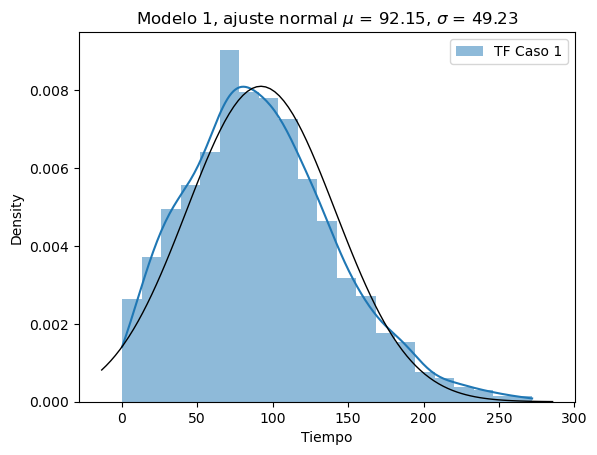

In [5]:
# Distribución del tiempo a la falla Caso 1
TMF1_df=pd.DataFrame(tiempo_falla_caso1)
TMF1_df.columns = ['TF Caso 1']
TMF1_df.loc[:,'TF Caso 1']

sns.histplot(TMF1_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF1_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel('Tiempo')
plt.title(r'Modelo 1, ajuste normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
plt.show()

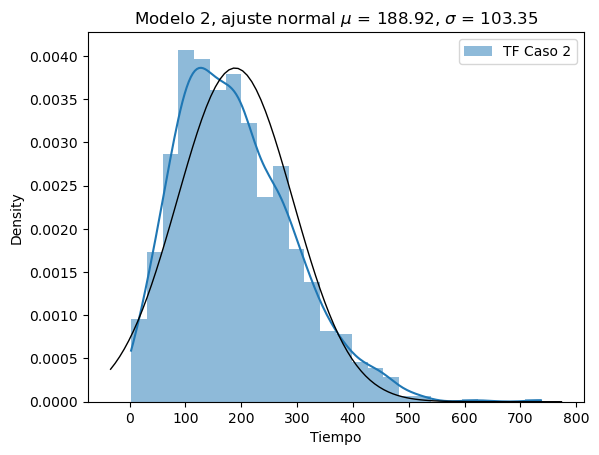

In [6]:
# Distribución del tiempo a la falla Caso 2
TMF2_df=pd.DataFrame(tiempo_falla_caso2)
TMF2_df.columns = ['TF Caso 2']
TMF2_df.loc[:,'TF Caso 2']

sns.histplot(TMF2_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF2_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel('Tiempo')
plt.title(r'Modelo 2, ajuste normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
plt.show()

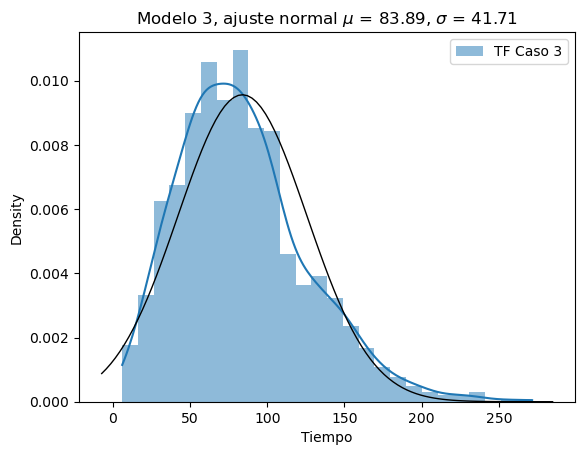

In [7]:
# Distribución del tiempo a la falla Caso 3
TMF3_df=pd.DataFrame(tiempo_falla_caso3)
TMF3_df.columns = ['TF Caso 3']
TMF3_df.loc[:,'TF Caso 3']

sns.histplot(TMF3_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF3_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel('Tiempo')
plt.title(r'Modelo 3, ajuste normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
plt.show()

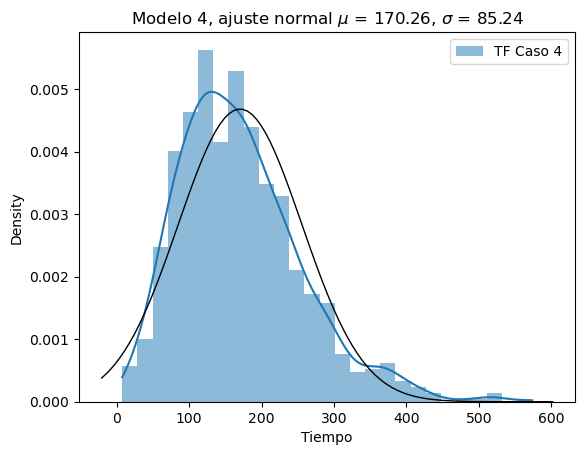

In [8]:
# Distribución del tiempo a la falla Caso 4
TMF4_df=pd.DataFrame(tiempo_falla_caso4)
TMF4_df.columns = ['TF Caso 4']
TMF4_df.loc[:,'TF Caso 4']

sns.histplot(TMF4_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF4_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel('Tiempo')
plt.title(r'Modelo 4, ajuste normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
plt.show()

<h5> $\bullet$ Dibuje la función de confiabilidad ($t$ vs. $R(t)$) para todos  los casos. Analice los casos, compárelos y concluya.<\h5>

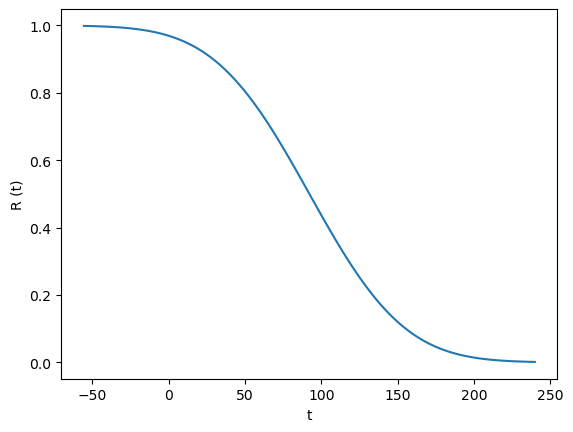

In [9]:
# Plot R (t) vs t caso 1
param = ss.norm.fit(TMF1_df)
x1=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf1=ss.norm.sf(x1, loc=param[0], scale=param[1])
plt.xlabel("t") # Establecer el título del eje x
plt.ylabel("R (t)") # Establecer el título del eje y
plt.plot(x1,sf1)

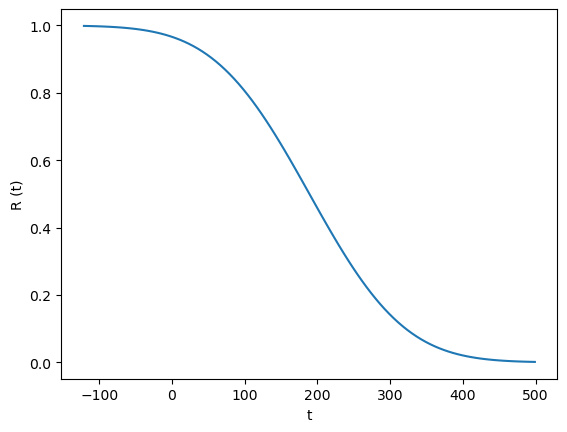

In [10]:
# Plot R (t) vs t caso 2
param = ss.norm.fit(TMF2_df)
x2=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf2=ss.norm.sf(x2, loc=param[0], scale=param[1])
plt.xlabel("t") # Establecer el título del eje x
plt.ylabel("R (t)") # Establecer el título del eje y
plt.plot(x2,sf2)

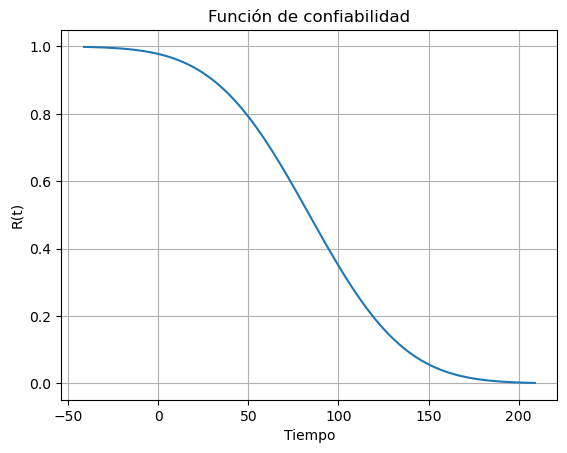

In [11]:
# Plot R (t) vs t caso 3
param = ss.norm.fit(TMF3_df)
x3=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf3=ss.norm.sf(x3, loc=param[0], scale=param[1])
plt.xlabel("t") # Establecer el título del eje x
plt.ylabel("R (t)") # Establecer el título del eje y
plt.plot(x3,sf3)
plt.xlabel('Tiempo')
plt.ylabel('R(t)')
plt.title('Función de confiabilidad')
plt.grid()

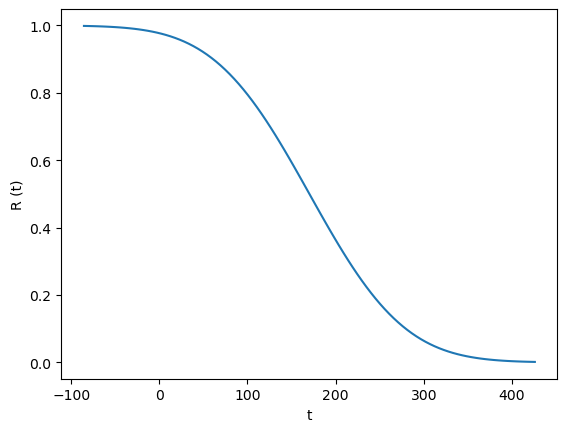

In [12]:
# Plot R (t) vs t caso 4
param = ss.norm.fit(TMF4_df)
x4=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf4=ss.norm.sf(x4, loc=param[0], scale=param[1])
plt.xlabel("t") # Establecer el título del eje x
plt.ylabel("R (t)") # Establecer el título del eje y
plt.plot(x4,sf4)

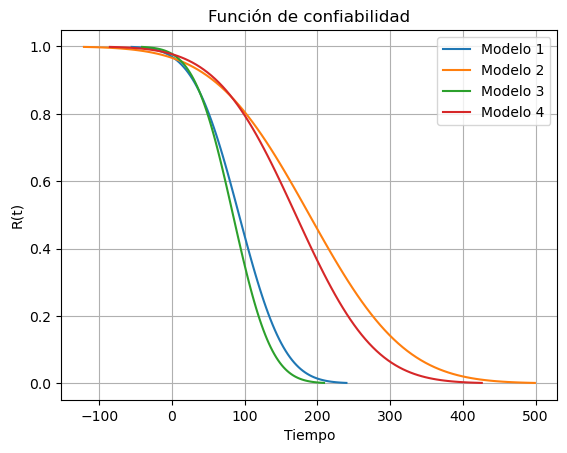

In [13]:
plt.plot(x1,sf1, label='Modelo 1')
plt.plot(x2,sf2, label='Modelo 2')
plt.plot(x3,sf3, label='Modelo 3')
plt.plot(x4,sf4, label='Modelo 4')
plt.xlabel('Tiempo')
plt.ylabel('R(t)')
plt.legend()
plt.title('Función de confiabilidad')
plt.grid()

<h4> 4. Retome el caso 3 del punto anterior. Suponga que además del daño causado por shocks, el sistema también sufre un deterioro progresivo con una tasa constante de 0.25/año. Utilizando simulación, calcule la distribución del tiempo a la falla y comparela con el caso 3 del punto anterior; concluya. Nota: en este caso, entre shocks el sistema se deteriora con la tasa indicada.  <\h4>

In [14]:
tiempo_falla_caso1_det=np.zeros(1000)
tiempo_falla_caso2_det=np.zeros(1000)
tiempo_falla_caso3_det=np.zeros(1000)
tiempo_falla_caso4_det=np.zeros(1000)

In [15]:
#Función de tiempo a la falla para deterioro progresivo entre shocks Caso 1
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.lognormal(np.log(10)-0.5*np.log(1+2**2),(np.log(1+2**2))**(1/2))
        n_time=np.random.exponential(1/lambda_caso1)
        tiempo=tiempo+n_time
        suma_shocks=suma_shocks+n_time*0.25
        v=v0-suma_shocks
    tiempo_falla_caso1_det[i]=tiempo 
    
#Función de tiempo a la falla para deterioro progresivo entre shocks Caso 2
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.lognormal(np.log(10)-0.5*np.log(1+2**2),(np.log(1+2**2))**(1/2))
        n_time=np.random.exponential(1/lambda_caso2)
        tiempo=tiempo+n_time
        suma_shocks=suma_shocks+n_time*0.25
        v=v0-suma_shocks
    tiempo_falla_caso2_det[i]=tiempo 
    
#Función de tiempo a la falla para deterioro progresivo entre shocks Caso 3
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.exponential(10)
        n_time=np.random.exponential(1/lambda_caso3)
        tiempo=tiempo+n_time
        suma_shocks=suma_shocks+n_time*0.25
        v=v0-suma_shocks
    tiempo_falla_caso3_det[i]=tiempo 
    
#Función de tiempo a la falla para deterioro progresivo entre shocks Caso 4
for i in range(0,1000):
    v=100
    suma_shocks=0
    tiempo=0
    while v>k:
        suma_shocks=suma_shocks+np.random.exponential(10)
        n_time=np.random.exponential(1/lambda_caso4)
        tiempo=tiempo+n_time
        suma_shocks=suma_shocks+n_time*0.25
        v=v0-suma_shocks
    tiempo_falla_caso4_det[i]=tiempo
    
TMF_det_progresivo_C1=round(tiempo_falla_caso1_det.mean(),2)
TMF_det_progresivo_C2=round(tiempo_falla_caso2_det.mean(),2)
TMF_det_progresivo_C3=round(tiempo_falla_caso3_det.mean(),2)
TMF_det_progresivo_C4=round(tiempo_falla_caso4_det.mean(),2)
TMF_det_progresivo_C1,TMF_det_progresivo_C2, TMF_det_progresivo_C3, TMF_det_progresivo_C4

(77.02, 124.79, 68.08, 117.27)

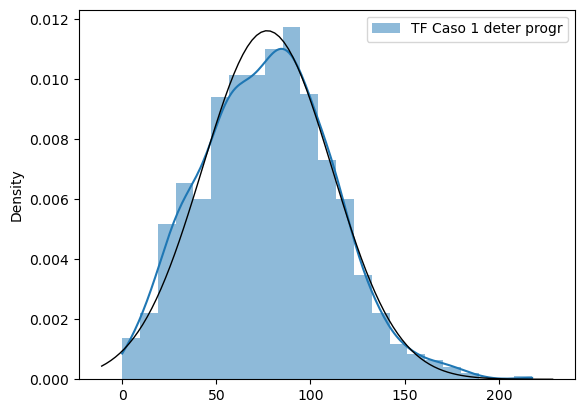

In [16]:
# Distribución del tiempo a la falla Caso 1
TMF1_deter_df=pd.DataFrame(tiempo_falla_caso1_det)
TMF1_deter_df.columns = ['TF Caso 1 deter progr']
TMF1_deter_df.loc[:,'TF Caso 1 deter progr']

sns.histplot(TMF1_deter_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF1_deter_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.show()

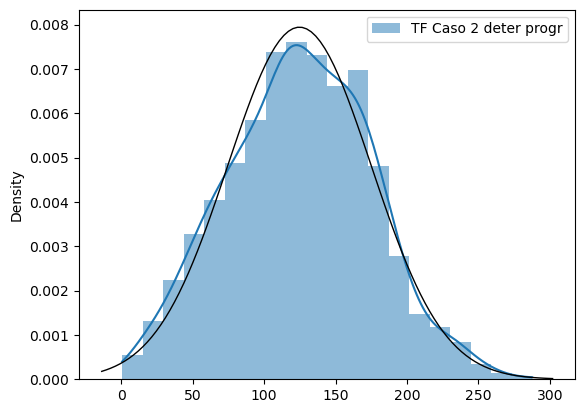

In [17]:
# Distribución del tiempo a la falla Caso 2
TMF2_deter_df=pd.DataFrame(tiempo_falla_caso2_det)
TMF2_deter_df.columns = ['TF Caso 2 deter progr']
TMF2_deter_df.loc[:,'TF Caso 2 deter progr']

sns.histplot(TMF2_deter_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF2_deter_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.show()

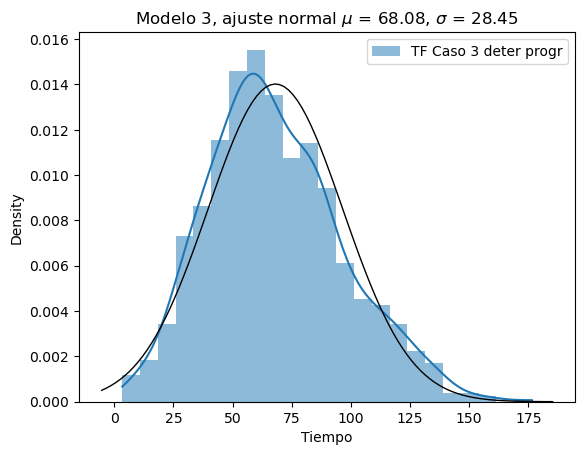

In [18]:
# Distribución del tiempo a la falla Caso 3
TMF3_deter_df=pd.DataFrame(tiempo_falla_caso3_det)
TMF3_deter_df.columns = ['TF Caso 3 deter progr']
TMF3_deter_df.loc[:,'TF Caso 3 deter progr']

sns.histplot(TMF3_deter_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF3_deter_df)
xmin, xmax = plt.xlim()
plt.title(r'Modelo 3, ajuste normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel('Tiempo')
plt.show()

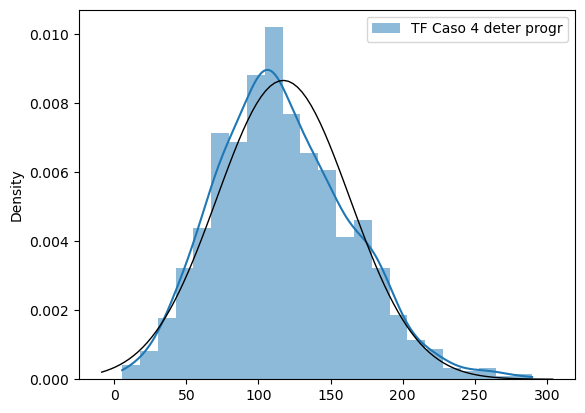

In [19]:
# Distribución del tiempo a la falla Caso 4
TMF4_deter_df=pd.DataFrame(tiempo_falla_caso4_det)
TMF4_deter_df.columns = ['TF Caso 4 deter progr']
TMF4_deter_df.loc[:,'TF Caso 4 deter progr']

sns.histplot(TMF4_deter_df, kde=True, stat="density", linewidth=0),

# Plot norm PDF.
mu, std = ss.norm.fit(TMF4_deter_df)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.show()

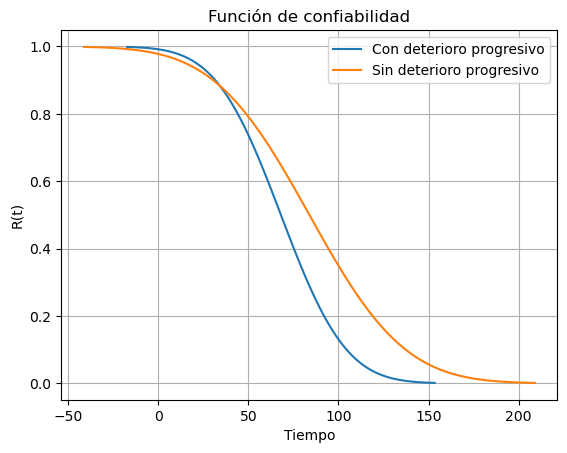

In [20]:
# Plot R (t) vs t caso 3
param = ss.norm.fit(TMF3_deter_df)
x3b=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf3b=ss.norm.sf(x3b, loc=param[0], scale=param[1])
plt.xlabel("t") # Establecer el título del eje x
plt.ylabel("R (t)") # Establecer el título del eje y
plt.plot(x3b,sf3b, label = 'Con deterioro progresivo')
plt.xlabel('Tiempo')
plt.ylabel('R(t)')
plt.title('Función de confiabilidad')

param = ss.norm.fit(TMF3_df)
x3=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
sf3=ss.norm.sf(x3, loc=param[0], scale=param[1])
plt.plot(x3,sf3, label = 'Sin deterioro progresivo')
plt.grid()
plt.legend()